In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bigmarttrain = pd.read_csv('bigmart_train.csv')
bigmarttest = pd.read_csv('bigmart_test.csv')

In [3]:
bigmarttrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
bigmarttrain.shape

(8523, 12)

In [5]:
bigmarttest.shape

(5681, 11)

In [6]:
bigmarttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
bigmarttest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
bigmarttrain.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
bigmarttest.isnull().sum()
#Item_Weight is Numeric
#Outlet_Size is Object

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
bigmarttrain1 = bigmarttrain.drop('Item_Outlet_Sales', axis = 1)

In [11]:
bigmarttrain1['Type'] = 'Train'
bigmarttest['Type'] = 'Test'

In [12]:
#Both Train and Test data have Missing Values in Same cols

combinedata = pd.concat([bigmarttrain1, bigmarttest], axis = 0)


In [13]:
combinedata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,Train


In [14]:
combinedata.shape

(14204, 12)

In [15]:
combinedata.isnull().sum().sort_values(ascending = False)

Outlet_Size                  4016
Item_Weight                  2439
Type                            0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64

In [16]:
#percentage of Missing Data
print((4016/14204)*100) #Outlet_Size
print((2439/14204)*100) #Item_Weight

28.273725711067303
17.17121937482399


In [17]:
#Splitting Combine Data into Object and Numeric Data
objectdata = combinedata.select_dtypes(include=np.object)
numericdata = combinedata.select_dtypes(include = np.number)

In [18]:
print(numericdata.shape)
print(objectdata.shape)

(14204, 4)
(14204, 8)


In [19]:
numericdata.Item_Weight.describe()
#mean  -  12.792854 and Median/50%    - 12.600000

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [20]:
from sklearn.impute import SimpleImputer
numericimputer = SimpleImputer(missing_values=np.nan , strategy = 'median')

In [21]:
numericdatadf = numericimputer.fit_transform(numericdata)

In [22]:
numlabels = numericdata.columns

In [23]:
numericdatadf = pd.DataFrame(numericdatadf, columns = numlabels)

In [24]:
numericdatadf.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999.0
1,5.92,0.019278,48.2692,2009.0
2,17.50,0.016760,141.6180,1999.0
3,19.20,0.000000,182.0950,1998.0
4,8.93,0.000000,53.8614,1987.0


In [25]:
#Treating Missing Values in Objectdata


In [26]:
objectdata.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,Train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,Train
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,Train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,Train


In [27]:
objectdata.Outlet_Size.value_counts()#If we use Simple Imputer with mostfrequent it will Create a larger diff 
                                     #between Value counts of Medium and Small 
                                     #as it is now 700 it will be increased with 4016(NA values in Outlet_Size) 
                                     #if we impute using most frequent

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [28]:
objectdatadf = objectdata.fillna('unknown')

In [29]:
objectdatadf.Outlet_Size.value_counts()

Medium     4655
unknown    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64

In [30]:
objectdatadf.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Type'],
      dtype='object')

In [31]:
freqcols = ['Item_Fat_Content', 'Item_Type','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [32]:
for col in freqcols:
    print("Column -",col)
    print(objectdatadf[col].value_counts(),'\n')

Column - Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64 

Column - Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64 

Column - Outlet_Size
Medium     4655
unknown    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64 

Column - Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64 

Column - Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Ty

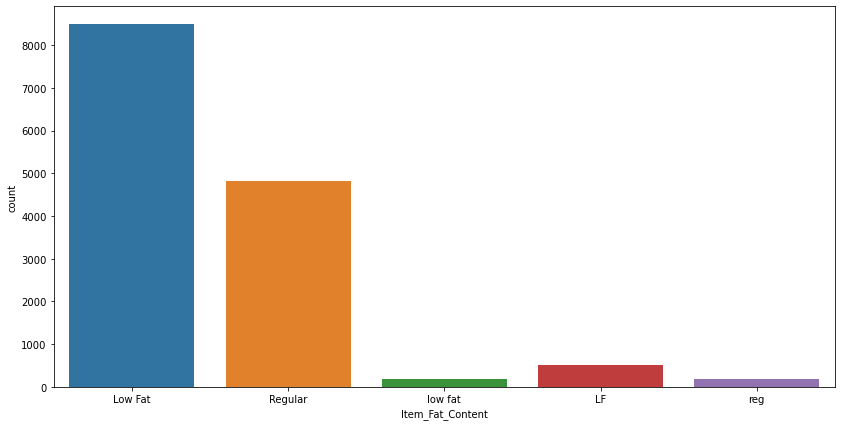

In [33]:
import seaborn as sns
plt.figure(figsize = (14,7))
sns.countplot(objectdatadf.Item_Fat_Content)

In [34]:
#Correct the repeatation of Classes in Item_Fat_Content
objectdatadf['Item_Fat_Content'] = objectdatadf['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')

In [35]:
objectdatadf['Item_Fat_Content'] = objectdatadf['Item_Fat_Content'].replace(['reg'],'Regular')

In [36]:
objectdatadf.Item_Fat_Content.value_counts()#LF, low fat - Low Fat
                                            #reg - Regular Corrections done

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

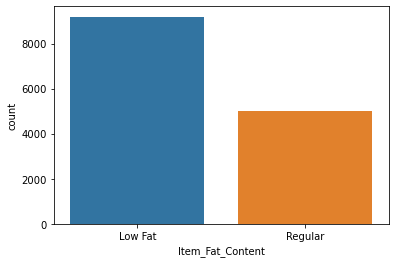

In [37]:
#plt.figure(figsize = (14,7))
sns.countplot(objectdatadf.Item_Fat_Content)

In [38]:
objectdatadf.Item_Identifier.head(10)
#Prefixes here FD - Foods DR  - Drinks NC - Non Consumeable

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

In [39]:
objectdatadf[['Item_Identifier','Item_Type']].head(10)

,Item_Identifier,Item_Type
0,FDA15,Dairy
1,DRC01,Soft Drinks
2,FDN15,Meat
3,FDX07,Fruits and Vegetables
4,NCD19,Household
5,FDP36,Baking Goods
6,FDO10,Snack Foods
7,FDP10,Snack Foods
8,FDH17,Frozen Foods
9,FDU28,Frozen Foods


In [40]:
objectdatadf['codes'] = objectdatadf['Item_Identifier'].apply(lambda x : x[0:2])

In [41]:
objectdatadf.codes.value_counts() #Hence Verified that there ae 3 prefixed values only FD, DR, NC

FD    10201
NC     2686
DR     1317
Name: codes, dtype: int64

In [42]:
objectdatadf.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Type', 'codes'],
      dtype='object')

In [43]:
objectdatadf.Outlet_Identifier.head()

0    OUT049
1    OUT018
2    OUT049
3    OUT010
4    OUT013
Name: Outlet_Identifier, dtype: object

In [44]:
numericdatadf.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [45]:
numericdatadf.Item_Visibility.describe()
# min is 0 that means no data there

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [46]:
zerovisibilty = numericdatadf[numericdatadf.Item_Visibility == 0]

In [47]:
zerovisibilty.shape

(879, 4)

In [48]:
numericdatadf.Item_Visibility = numericdatadf.Item_Visibility.replace(0, numericdatadf.Item_Visibility.median())

In [49]:
zerovisibilty = numericdatadf[numericdatadf.Item_Visibility == 0]
zerovisibilty.shape

(0, 4)

In [50]:
numericdata.Outlet_Establishment_Year.describe()

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [51]:
numericdatadf['Outlet_Age'] = 2020 - numericdatadf.Outlet_Establishment_Year

In [52]:
numericdatadf.Outlet_Age
#We have 2 cols Outlet_Establishment_Year and Outlet_Age

0        21.0
1        11.0
2        21.0
3        22.0
4        33.0
         ... 
14199    23.0
14200    11.0
14201    18.0
14202    13.0
14203    18.0
Name: Outlet_Age, Length: 14204, dtype: float64

In [53]:
numericdatadf.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Age'],
      dtype='object')

In [54]:
numericdatadf.drop('Outlet_Establishment_Year', axis = 1, inplace = True)

In [55]:
objectdatadf.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Type', 'codes'],
      dtype='object')

In [56]:
#One hot Encoding
objectdummy = pd.get_dummies(objectdatadf, columns = ['Item_Fat_Content','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','codes'])

In [57]:
objectdummy.head()

,Item_Identifier,Item_Type,Outlet_Identifier,Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,codes_DR,codes_FD,codes_NC
0,FDA15,Dairy,OUT049,Train,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1,DRC01,Soft Drinks,OUT018,Train,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0
2,FDN15,Meat,OUT049,Train,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,FDX07,Fruits and Vegetables,OUT010,Train,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0
4,NCD19,Household,OUT013,Train,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1


In [58]:
objectdummy.drop(['Item_Identifier','Item_Type', 'Outlet_Identifier'], axis = 1, inplace = True)

In [59]:
numericdatadf.reset_index(drop = True, inplace = True)
objectdummy.reset_index(drop = True, inplace = True)

In [60]:
cleaneddata = pd.concat([numericdatadf, objectdummy], axis = 1)

In [61]:
cleaneddata.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,codes_DR,codes_FD,codes_NC
0,9.30,0.016047,249.8092,21.0,Train,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,11.0,Train,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,21.0,Train,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.054021,182.0950,22.0,Train,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.054021,53.8614,33.0,Train,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [62]:
#Split back to test and Train
bigmarttraindf = cleaneddata[cleaneddata.Type == 'Train']

In [63]:
bigmarttestdf = cleaneddata[cleaneddata.Type == 'Test']

In [64]:
bigmarttestdf.shape

(5681, 21)

In [65]:
bigmarttraindf.shape

(8523, 21)

In [66]:
bigmarttraindf.drop('Type', axis = 1, inplace=True)

D:\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [67]:
bigmarttestdf.drop('Type', axis = 1, inplace=True)

In [68]:
bigmarttraindf['Item_Outlet_Sales'] = bigmarttrain.Item_Outlet_Sales

<ipython-input-68-2eeadaa99627>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigmarttraindf['Item_Outlet_Sales'] = bigmarttrain.Item_Outlet_Sales


In [69]:
bigmarttraindf.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_unknown,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,codes_DR,codes_FD,codes_NC,Item_Outlet_Sales
0,9.30,0.016047,249.8092,21.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,3735.1380
1,5.92,0.019278,48.2692,11.0,0,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,443.4228
2,17.50,0.016760,141.6180,21.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,2097.2700
3,19.20,0.054021,182.0950,22.0,0,1,0,0,0,1,...,0,1,1,0,0,0,0,1,0,732.3800
4,8.93,0.054021,53.8614,33.0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,994.7052


In [70]:
#Managment want to know Low Fat or Regular items are equally important or not?
bigmarttraindf.groupby('Item_Fat_Content_Low Fat').agg({'Item_Outlet_Sales':'mean'}) #1 - Low Fat # 0 - Regular as used Item_Fat_Content_Low Fat to groupby

,Item_Outlet_Sales
Item_Fat_Content_Low Fat,
0,2224.561170
1,2157.711534


In [71]:
lowfat = bigmarttraindf[bigmarttraindf['Item_Fat_Content_Low Fat'] == 1]

In [72]:
regular = bigmarttraindf[bigmarttraindf['Item_Fat_Content_Regular'] == 1]

In [73]:
lowfat.Item_Outlet_Sales.mean()

2157.7115339858597

In [74]:
regular.Item_Outlet_Sales.mean()

2224.561170126416

In [75]:
#ttest_ind() - One Categorical with 2 classes and one numerical Var
from scipy.stats import ttest_ind

In [76]:
ttest_ind(lowfat.Item_Outlet_Sales, regular.Item_Outlet_Sales, equal_var = False)
#Failed to reject Nul Hypothesis - H0 mean of samples are equal

Ttest_indResult(statistic=-1.7212101304652045, pvalue=0.0852633946472846)

In [77]:
#Average Sales for Tier1, Tier2 nd Tier3 cities is same
#Anova
tier1 = bigmarttraindf[bigmarttraindf['Outlet_Location_Type_Tier 1'] == 1]

In [78]:
tier2 = bigmarttraindf[bigmarttraindf['Outlet_Location_Type_Tier 2'] == 1]
tier3 = bigmarttraindf[bigmarttraindf['Outlet_Location_Type_Tier 3'] == 1]
                       

In [79]:
print(tier1.Item_Outlet_Sales.mean())
print(tier2.Item_Outlet_Sales.mean())
print(tier3.Item_Outlet_Sales.mean())

1876.9091591289784
2323.990558850987
2279.6276513432786


In [80]:
#Anova - One Categorical with more than 2 classes and one numerical Var
from scipy.stats import f_oneway

In [81]:
f_oneway(tier1.Item_Outlet_Sales,tier2.Item_Outlet_Sales,tier3.Item_Outlet_Sales)
#Since P value is less that 0.05 Reject Null
#H0 - Samples have equal means
#H1 - There is difference between means of Sample

F_onewayResult(statistic=53.94773987456066, pvalue=5.2228172988842975e-24)

In [82]:
#What is the content preference of Different Outlet Types
pd.crosstab(objectdatadf.Item_Fat_Content, objectdatadf.Outlet_Type)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Fat_Content,,,,
Low Fat,1165,6013,999,1008
Regular,640,3281,547,551


In [83]:
#Both Variables are non Numeric and Categorical
#Chi Square test
# Null Samples are Independent
# Alt Samples are dependent
from scipy.stats import chi2_contingency

In [84]:
chi2_contingency(pd.crosstab(objectdatadf.Item_Fat_Content, objectdatadf.Outlet_Type))
#p value 0.99 failed to reject Null

(0.017623807274356466,
 0.9993810246002263,
 3,
 array([[1167.20114052, 6009.95423824,  999.71909321, 1008.12552802],
        [ 637.79885948, 3284.04576176,  546.28090679,  550.87447198]]))

In [85]:
#Structure of dependent Var
bigmarttrain.Item_Outlet_Sales.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [86]:
bigmarttrain.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

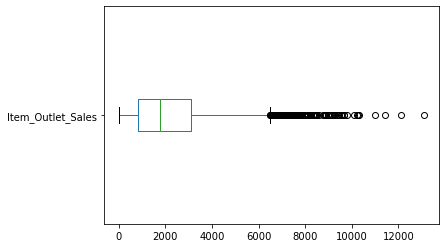

In [87]:
bigmarttrain.Item_Outlet_Sales.plot(kind = 'box', vert = False) #Has Outliers

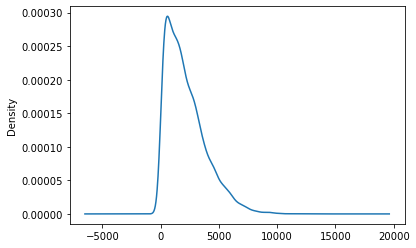

In [88]:
bigmarttrain.Item_Outlet_Sales.plot(kind = 'density') #Positive Skewness

In [89]:
target = np.sqrt(bigmarttrain.Item_Outlet_Sales)

In [90]:
target = pd.Series(target)

In [91]:
#Splitting data into dependent and Independent
X = bigmarttraindf.drop('Item_Outlet_Sales', axis = 1)
y = target

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
LinReg = LinearRegression()

In [94]:
LinRegmodel = LinReg.fit(X,y)

In [95]:
LinRegmodel.score(X,y)

0.656280986991133

In [96]:
y_pred = LinRegmodel.predict(X)

In [97]:
from sklearn.metrics import mean_squared_error

In [98]:
rmse = np.sqrt(mean_squared_error(np.square(y_pred), np.square(y)))
rmse

1096.923892120909

In [99]:
bigmarttraindf.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_unknown,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,codes_DR,codes_FD,codes_NC,Item_Outlet_Sales
Item_Weight,1.000000,-0.018773,0.024951,-0.007739,0.021092,-0.021092,0.015976,-0.002791,-0.002981,-0.005190,...,-0.007382,0.005174,-0.004778,0.011747,0.004956,-0.017723,-0.050156,-0.008183,0.046872,0.009693
Item_Visibility,-0.018773,1.000000,-0.004537,0.078273,-0.049794,0.049794,-0.043643,-0.083994,0.066331,0.051642,...,-0.073390,0.011844,0.299205,-0.152831,-0.033374,-0.053023,-0.012531,0.068443,-0.069477,-0.134097
Item_MRP,0.024951,-0.004537,1.000000,-0.005020,-0.006063,0.006063,0.002438,-0.004510,0.009793,-0.006754,...,0.001951,-0.000744,-0.004277,0.004885,0.003850,-0.006714,-0.051733,0.029315,0.004859,0.567574
Outlet_Age,-0.007739,0.078273,-0.005020,1.000000,0.003151,-0.003151,0.453388,0.016346,0.056567,-0.387636,...,-0.540820,0.333895,0.281196,-0.245070,-0.466336,0.538072,-0.009441,0.002312,0.004385,0.049135
Item_Fat_Content_Low Fat,0.021092,-0.049794,-0.006063,0.003151,1.000000,-1.000000,0.002132,-0.004671,0.002313,0.001085,...,0.003272,-0.000241,0.002924,-0.000533,-0.002129,-0.000183,0.177593,-0.423092,0.354722,-0.018719
Item_Fat_Content_Regular,-0.021092,0.049794,0.006063,-0.003151,-1.000000,1.000000,-0.002132,0.004671,-0.002313,-0.001085,...,-0.003272,0.000241,-0.002924,0.000533,0.002129,0.000183,-0.177593,0.423092,-0.354722,0.018719
Outlet_Size_High,0.015976,-0.043643,0.002438,0.453388,0.002132,-0.002132,1.000000,-0.244634,-0.218609,-0.220009,...,-0.244113,0.435419,-0.133686,0.254668,-0.122481,-0.122999,-0.000479,-0.003993,0.004957,0.024170
Outlet_Size_Medium,-0.002791,-0.083994,-0.004510,0.016346,-0.004671,0.004671,-0.244634,1.000000,-0.435580,-0.438369,...,-0.486397,0.391617,-0.266370,-0.471782,0.500670,0.502787,-0.005003,0.010467,-0.008320,0.204701
Outlet_Size_Small,-0.002981,0.066331,0.009793,0.056567,0.002313,-0.002313,-0.218609,-0.435580,1.000000,-0.391734,...,0.083381,-0.502066,0.176158,0.163388,-0.218082,-0.219004,-0.003465,0.002254,-0.000008,-0.098403
Outlet_Size_unknown,-0.005190,0.051642,-0.006754,-0.387636,0.001085,-0.001085,-0.220009,-0.438369,-0.391734,1.000000,...,0.592970,-0.209237,0.194602,0.152308,-0.219478,-0.220406,0.009002,-0.010389,0.005245,-0.131973


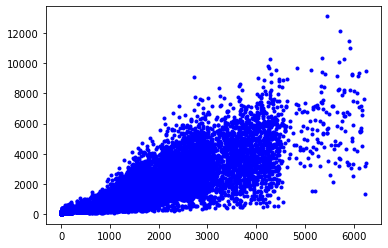

In [100]:
plt.plot(np.square(y_pred), bigmarttrain.Item_Outlet_Sales, 'b.')

In [101]:
result = LinRegmodel.predict(bigmarttestdf)

In [102]:
np.square(result)

array([1637.39064529, 1408.2488789 , 1137.023985  , ..., 1635.07401285,
       3428.91396906, 1185.53211052])

In [103]:
result = pd.Series(result)

In [104]:
X = bigmarttraindf.drop('Item_Outlet_Sales', axis = 1)
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
Xlabels = X.columns

In [105]:
X_scaled = robust.fit_transform(X)

In [106]:
X_scaled = pd.DataFrame(X_scaled, columns = Xlabels)
y = target

In [107]:
Linregscaled = LinReg.fit(X_scaled,y)

In [108]:
Linregscaled.score(X_scaled,y)

0.656280986991133

In [109]:
Linregscaled_predict = Linregscaled.predict(X)

In [110]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(np.square(y_pred), np.square(y)))
rmse

1096.923892120909

In [124]:
X = bigmarttestdf
Xlabels = X.columns
X_scaled = robust.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = Xlabels)
pred_result = Linregscaled.predict(X_scaled)

In [116]:
pred_result

array([40.71921086, 37.77289103, 34.01989782, ..., 40.69230424,
       58.84893738, 34.67225843])

In [117]:
pred_result = np.square(pred_result)

In [118]:
pred_result = pd.Series(pred_result)

In [119]:
pred_result.to_csv('Bigmartresult.csv')

In [111]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
xgb_model = xgb_reg.fit(X_scaled,y)

In [112]:
y_pred = xgb_reg.predict(X_scaled)
rmse = np.sqrt(mean_squared_error(np.square(y_pred), np.square(y)))
rmse

D:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


750.0490589959951

In [125]:
testdata = bigmarttestdf
testlabels = testdata.columns
testdata = robust.transform(testdata)
testdata = pd.DataFrame(testdata, columns = testlabels)
y_result = xgb_model.predict(testdata)

D:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [126]:
y_result = np.square(y_result)

In [127]:
y_result = pd.Series(y_result)

In [122]:
y_result.to_csv("XGB.csv")

In [128]:
y_result

0       2142.919678
1       1472.128540
2        543.917725
3       2277.778564
4       5231.420410
           ...     
5676    1724.713867
5677    3424.060547
5678    1769.828369
5679    5255.697754
5680    1454.202148
Length: 5681, dtype: float32

In [ ]:
#Linear Regression model gives least RMSE Compared to Xgboost